# Data Exploration

In [652]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [653]:
df= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Product Category 2 and Product Category 3 contains NaN's

Number of Unique Elements across each available column

In [654]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [655]:
#How is the Purchase distributed by Occupation
occup_df=df.groupby(['Occupation'])['Purchase'].agg(['sum','count']).reset_index()
occup_df['AvgPurchaseByOccupation']=(occup_df['sum']/occup_df['count']).round(0)
occup_df.head()

,Occupation,sum,count,AvgPurchaseByOccupation
0,0,635406958,69638,9124.0
1,1,424614144,47426,8953.0
2,2,238028583,26588,8952.0
3,3,162002168,17650,9179.0
4,4,666244484,72308,9214.0


In [656]:
#Purchase Distribution by Gender and Marital Status
gen_status_df=df.groupby(['Marital_Status','Gender'])['Purchase'].agg(['sum','count']).reset_index()
gen_status_df['PurchaseAvgByGenderStatus']=(gen_status_df['sum']/gen_status_df['count']).round()
gen_status_df
#Average Purchase is higher in males and for female its relatively higher for married females

,Marital_Status,Gender,sum,count,PurchaseAvgByGenderStatus
0,0,F,684154127,78821,8680.0
1,0,M,2324773320,245910,9454.0
2,1,F,502078515,56988,8810.0
3,1,M,1584806780,168349,9414.0


In [657]:
#How is the Purchase distributed by City_Category
citcat_df=df.groupby(['City_Category'])['Purchase'].agg(['sum','count']).reset_index()
citcat_df['AvgPurchaseByCity']=(citcat_df['sum']/citcat_df['count']).round()
citcat_df
#Shows higher purchase in City C

,City_Category,sum,count,AvgPurchaseByCity
0,A,1316471661,147720,8912.0
1,B,2115533605,231173,9151.0
2,C,1663807476,171175,9720.0


In [658]:
#Products Distribution by Product_Category_1
#df.groupby(['Product_Category_1'])['Product_ID','Purchase'].count().reset_index().rename(columns={'Product_ID':'SellCount'})

prdcat1_df=df.groupby(['Product_Category_1'])['Product_ID','Purchase'].agg({'Product_ID':'count', 'Purchase':'sum'}).reset_index().rename(columns={'Product_ID':'SellCount','Purchase':'TotalPurchase'}).sort_values(['TotalPurchase'], ascending=False)
prdcat1_df['AvgPurchaseByProdCat']=(prdcat1_df['TotalPurchase']/prdcat1_df['SellCount']).round(0)
prdcat1_df.head()


,Product_Category_1,TotalPurchase,SellCount,AvgPurchaseByProdCat
0,1,1910013754,140378,13606.0
4,5,941835229,150933,6240.0
7,8,854318799,113925,7499.0
5,6,324150302,20466,15838.0
1,2,268516186,23864,11252.0


In [659]:
# Find Average Product Purchase Amount to add 
product_avg_purchase=df.groupby(['Product_ID'])['Purchase'].mean().reset_index().rename(columns={'Purchase':'MeanProdPurchase'})
product_avg_purchase.head()


,Product_ID,MeanProdPurchase
0,P00000142,11143.642361
1,P00000242,10551.851064
2,P00000342,5313.422131
3,P00000442,4795.358696
4,P00000542,5417.530201


In [660]:
# Find Average  Purchase Amount by User for Binning Purpose
user_avg_purchase=df.groupby(['User_ID'])['Purchase'].mean().reset_index().rename(columns={'Purchase':'AvgUserPurchase'})
user_avg_purchase.head()


,User_ID,AvgUserPurchase
0,1000001,9545.514286
1,1000002,10525.610390
2,1000003,11780.517241
3,1000004,14747.714286
4,1000005,7745.292453


In [661]:
#Merge the Occupation Avg Purchase
temp=pd.merge(df,occup_df[['Occupation','AvgPurchaseByOccupation']],how='left',on=['Occupation'])
temp=pd.merge(temp,gen_status_df[['Marital_Status','Gender','PurchaseAvgByGenderStatus']],how='left',on=['Marital_Status','Gender'])
#temp.head()

temp=pd.merge(temp,citcat_df[['City_Category','AvgPurchaseByCity']],how='left',on=['City_Category'])
#temp.columns

temp=pd.merge(temp,prdcat1_df[['Product_Category_1','AvgPurchaseByProdCat']],how='left',on=['Product_Category_1'])
temp.head()

temp=pd.merge(temp,product_avg_purchase, on=['Product_ID'],how='left')

temp=pd.merge(temp,user_avg_purchase, on=['User_ID'],how='left')
temp.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,AvgPurchaseByOccupation,PurchaseAvgByGenderStatus,AvgPurchaseByCity,AvgPurchaseByProdCat,MeanProdPurchase,AvgUserPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,8959.0,8680.0,8912.0,10097.0,11870.863436,9545.514286
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,8959.0,8680.0,8912.0,13606.0,16304.030981,9545.514286
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,8959.0,8680.0,8912.0,1351.0,1237.892157,9545.514286
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,8959.0,8680.0,8912.0,1351.0,1455.140762,9545.514286
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,9394.0,9454.0,9720.0,7499.0,7692.763547,10525.610390


In [648]:
def ProdPurchaseHighLabel(x,y):
    if x<=y:
        PurchaseHigh=0
    elif x> 3 * y:
        PurchaseHigh=3
    elif x>2*y:
        PurchaseHigh=2
    elif x>y:
        PurchaseHigh=1
    return PurchaseHigh

#temp['ProdPurchHigherThanMean']=temp.apply(lambda x: ProdPurchaseHighLabel(x['Purchase'],x['MeanProdPurchase']),axis=1)
    

In [ ]:
temp['ProdPurchHigherThanMean'].describe()
#Create a userId ,ProductID and ProdPurchHigherThanMean data frame
userprodhigh=temp[['User_ID','Product_ID','ProdPurchHigherThanMean']]
#userprodhigh=(userprodhigh.drop_duplicates(inplace=True))
#Could nto map as there were no matching user,product comnbintion in test vs train?

In [662]:
#For Test Data
#Merge the Occupation Avg Purchase
testdf=pd.merge(test,occup_df[['Occupation','AvgPurchaseByOccupation']],how='left',on=['Occupation'])
testdf=pd.merge(testdf,gen_status_df[['Marital_Status','Gender','PurchaseAvgByGenderStatus']],how='left',on=['Marital_Status','Gender'])
#temp.head()

testdf=pd.merge(testdf,citcat_df[['City_Category','AvgPurchaseByCity']],how='left',on=['City_Category'])
#temp.columns

testdf=pd.merge(testdf,prdcat1_df[['Product_Category_1','AvgPurchaseByProdCat']],how='left',on=['Product_Category_1'])


testdf=pd.merge(testdf,product_avg_purchase, on=['Product_ID'],how='left')

testdf=pd.merge(testdf,user_avg_purchase, on=['User_ID'],how='left')

testdf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,AvgPurchaseByOccupation,PurchaseAvgByGenderStatus,AvgPurchaseByCity,AvgPurchaseByProdCat,MeanProdPurchase,AvgUserPurchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,9426.0,9414.0,9151.0,13606.0,15781.118590,14747.714286
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,9821.0,9454.0,9720.0,10097.0,11746.665354,10243.086207
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,8953.0,8810.0,9151.0,6240.0,5731.338028,9728.744395
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,8953.0,8810.0,9151.0,2330.0,1943.266667,9728.744395
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,8953.0,8680.0,9720.0,2330.0,2585.590829,7957.471429


In [663]:
testdf.columns

Index([u'User_ID', u'Product_ID', u'Gender', u'Age', u'Occupation',
       u'City_Category', u'Stay_In_Current_City_Years', u'Marital_Status',
       u'Product_Category_1', u'Product_Category_2', u'Product_Category_3',
       u'AvgPurchaseByOccupation', u'PurchaseAvgByGenderStatus',
       u'AvgPurchaseByCity', u'AvgPurchaseByProdCat', u'MeanProdPurchase',
       u'AvgUserPurchase'],
      dtype='object')

In [603]:
#new=pd.merge(testdf,userprodhigh[['User_ID', 'Product_ID', 'ProdPurchHigherThanMean']], on=['User_ID','Product_ID'],how='left')
#userprodhigh.columns
#userprodhigh[userprodhigh['User_ID']==1000010]

Number of Null Entries in Data

In [15]:
df['Product_Category_2'].unique()

array([ nan,   6.,  14.,   2.,   8.,  15.,  16.,  11.,   5.,   3.,   4.,
        12.,   9.,  10.,  17.,  13.,   7.,  18.])

In [641]:
# Drop NULL values related columns for now i.e Product_Category_2 and Product_Category_3
df1=temp.copy()
df1.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)
test1=testdf.copy()
test1.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [646]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 16 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Purchase                      550068 non-null int64
AvgPurchaseByOccupation       550068 non-null float64
PurchaseAvgByGenderStatus     550068 non-null float64
AvgPurchaseByCity             550068 non-null float64
AvgPurchaseByProdCat          550068 non-null float64
MeanProdPurchase              550068 non-null float64
AvgUserPurchase               550068 non-null float64
dtypes: float64(6), int64(5), object(5)


In [645]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,AvgPurchaseByOccupation,PurchaseAvgByGenderStatus,AvgPurchaseByCity,AvgPurchaseByProdCat,MeanProdPurchase,AvgUserPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8959.0,8680.0,8912.0,10097.0,11870.863436,9545.514286
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,8959.0,8680.0,8912.0,13606.0,16304.030981,9545.514286
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,8959.0,8680.0,8912.0,1351.0,1237.892157,9545.514286
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,8959.0,8680.0,8912.0,1351.0,1455.140762,9545.514286
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,9394.0,9454.0,9720.0,7499.0,7692.763547,10525.610390


In [644]:
train_X=df1.drop('Purchase',axis=1)
train_X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,AvgPurchaseByOccupation,PurchaseAvgByGenderStatus,AvgPurchaseByCity,AvgPurchaseByProdCat,MeanProdPurchase,AvgUserPurchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8959.0,8680.0,8912.0,10097.0,11870.863436,9545.514286
1,1000001,P00248942,F,0-17,10,A,2,0,1,8959.0,8680.0,8912.0,13606.0,16304.030981,9545.514286
2,1000001,P00087842,F,0-17,10,A,2,0,12,8959.0,8680.0,8912.0,1351.0,1237.892157,9545.514286
3,1000001,P00085442,F,0-17,10,A,2,0,12,8959.0,8680.0,8912.0,1351.0,1455.140762,9545.514286
4,1000002,P00285442,M,55+,16,C,4+,0,8,9394.0,9454.0,9720.0,7499.0,7692.763547,10525.610390


In [19]:
# categorical columns 
categorical_columns = ["User_ID","Product_ID", "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status", "Product_Category_1"]

In [20]:
#Convert all categorical to label encoder and str type
for var in categorical_columns:
    lb= preprocessing.LabelEncoder()
    alldata=pd.concat((train_X[var],test1[var]),axis=0).astype('str')
    lb.fit(alldata)
    train_X[var]=lb.transform(train_X[var].astype('str'))
    test1[var]=lb.transform(test1[var].astype('str'))
    

In [21]:
test1.isnull().sum()
#Change the NULL values i.e for products which did not exist in last month purchase to 0
test1['MeanProdPurchase'].fillna(0,inplace=True)
test1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
AvgPurchaseByOccupation       0
PurchaseAvgByGenderStatus     0
AvgPurchaseByCity             0
AvgPurchaseByProdCat          0
MeanProdPurchase              0
dtype: int64

In [22]:
#Keep the dataframe for use also, as most of the algo uses numpy conversion
X_traindf=train_X
X_testdf=test1
Y_traindf=df1['Purchase']

In [23]:
train_X = np.array(train_X)
test1 = np.array(test1)
train_y=np.array(df1['Purchase'])

In [27]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [169]:

#est = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.5,max_depth=7, max_features=5,random_state=42, loss='ls',verbose=1)
#est.fit(train_X, train_y)

In [43]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_y, est.predict(train_X)))

NameError: name 'est' is not defined

In [158]:
y_1 = est.predict(test1)
test['Purchase']= y_1
test.to_csv('final_gbr_newparam.csv', columns=['User_ID', 'Product_ID', 'Purchase'], index=False)

In [46]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, train_test_split

def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
    cv = ShuffleSplit(X_traindf.shape[0], n_iter=10, test_size=0.2) 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs,verbose=2)
    classifier.fit(X_traindf, Y_traindf) 
    #Let's look at the best estimator that was found by GridSearchCV 
    print "Best Estimator learned through GridSearch" 
    print classifier.best_estimator_ 
    return cv, classifier.best_estimator_ 

In [48]:
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1, 0.05, 0.02, 0.01], 
            'max_depth': [6,4,7], 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] 
           } 
n_jobs=20 

In [168]:
#cv,best_est=GradientBooster(param_grid, n_jobs)

In [54]:
#OK great, so we got back the best estimator parameters as follows: 
print "Best Estimator Parameters" 
print"---------------------------" 
print "n_estimators: %d" %best_est.n_estimators 
print "max_depth: %d" %best_est.max_depth 
print "Learning Rate: %.1f" %best_est.learning_rate 
print "min_samples_leaf: %d" %best_est.min_samples_leaf 
#print "max_features: %.1f" %best_est.max_features 
print 
print "Train R-squared: %.2f" %best_est.score(X_traindf,Y_traindf) 
print "Train RMSE: %.2f" %np.sqrt(mean_squared_error(Y_traindf, best_est.predict(X_traindf)))

Best Estimator Parameters
---------------------------
n_estimators: 500
max_depth: 7
Learning Rate: 0.1
min_samples_leaf: 17

Train R-squared: 0.78
Train RMSE: 2376.10


In [53]:
y_1 = best_est.predict(X_testdf)
test['Purchase'] = (y_1)
test.to_csv('gbr_withfridcv.csv', columns=['User_ID', 'Product_ID', 'Purchase'], index=False)

In [56]:
#Now try xgb on these features
import xgboost as xgb

In [186]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.09 #0.05 
params["max_depth"] = 8
params["min_child_weight"] = 15
#params["subsample"] = 0.6
#params["colsample_bytree"] = 0.7
#params["scale_pos_weight"] = 0.8
#params["lambda"] = 5
params["early_stopping_rounds"] = 10
params["seed"] = 42
params["nthread"] = 20
plst = list(params.items())

In [155]:
xgtrain = xgb.DMatrix(train_X, label=train_y)
num_rounds = 2000
model = xgb.train(plst, xgtrain, num_rounds,)

In [157]:
xgtest = xgb.DMatrix(test1)
pred_test_y_xgb1 = model.predict(xgtest)

In [156]:
model.eval(xgtrain)

'[0]\teval-rmse:2088.716553'

In [158]:
test['Purchase'] = (pred_test_y_xgb1)
test.to_csv('final_xgb.csv', columns=['User_ID', 'Product_ID', 'Purchase'], index=False)

In [166]:
X_traindf.columns

Index([u'User_ID', u'Product_ID', u'Gender', u'Age', u'Occupation',
       u'City_Category', u'Stay_In_Current_City_Years', u'Marital_Status',
       u'Product_Category_1', u'AvgPurchaseByOccupation',
       u'PurchaseAvgByGenderStatus', u'AvgPurchaseByCity',
       u'AvgPurchaseByProdCat', u'MeanProdPurchase'],
      dtype='object')

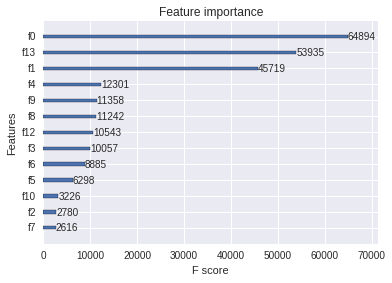

In [164]:
xgb.plot_importance(model)

In [ ]:
#Additonal Feature Engineering
#Add Product Cat 2 and 3 with Null = 0

In [664]:
df3=temp.copy()
#df1.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)
test3=testdf.copy()
#test1.drop(['Product_Category_2','Product_Category_3'],axis=1,inplace=True)

In [665]:
train_X=df3.drop('Purchase',axis=1)
#train_X.head()

In [666]:
test3.isnull().sum()
#Change the NULL values i.e for products which did not exist in last month purchase to 0
test3['MeanProdPurchase'].fillna(0,inplace=True)
#test3.isnull().sum()

In [668]:
test3.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
AvgPurchaseByOccupation            0
PurchaseAvgByGenderStatus          0
AvgPurchaseByCity                  0
AvgPurchaseByProdCat               0
MeanProdPurchase                   0
AvgUserPurchase                    0
dtype: int64

In [669]:
train_X['Product_Category_2'].fillna(0,inplace=True)
train_X['Product_Category_3'].fillna(0,inplace=True)
test3['Product_Category_2'].fillna(0,inplace=True)
test3['Product_Category_3'].fillna(0,inplace=True)

In [670]:
# categorical columns 
categorical_columns = ["User_ID","Product_ID", "Gender", "Occupation", "City_Category",
                       "Marital_Status", "Product_Category_1","Product_Category_2","Product_Category_3"]

In [671]:
#Convert all categorical to label encoder and str type
for var in categorical_columns:
    lb= preprocessing.LabelEncoder()
    alldata=pd.concat((train_X[var],test3[var]),axis=0).astype('str')
    lb.fit(alldata)
    train_X[var]=lb.transform(train_X[var].astype('str'))
    test3[var]=lb.transform(test3[var].astype('str'))
    

In [425]:
train_X['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [672]:
train_X.loc[train_X['Age']=='0-17','Age']=17
train_X.loc[train_X['Age']=='18-25','Age']=25
train_X.loc[train_X['Age']=='26-35','Age']=35
train_X.loc[train_X['Age']=='36-45','Age']=45
train_X.loc[train_X['Age']=='46-50','Age']=50
train_X.loc[train_X['Age']=='51-55','Age']=55
train_X.loc[train_X['Age']=='55+','Age']=60


In [673]:
train_X['Age']=pd.to_numeric(train_X['Age'])

In [674]:
train_X['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [675]:
train_X.loc[train_X['Stay_In_Current_City_Years']=='0','Stay_In_Current_City_Years']=0
train_X.loc[train_X['Stay_In_Current_City_Years']=='1','Stay_In_Current_City_Years']=1
train_X.loc[train_X['Stay_In_Current_City_Years']=='2','Stay_In_Current_City_Years']=2
train_X.loc[train_X['Stay_In_Current_City_Years']=='3','Stay_In_Current_City_Years']=3
train_X.loc[train_X['Stay_In_Current_City_Years']=='4+','Stay_In_Current_City_Years']=4


In [676]:
train_X['Stay_In_Current_City_Years']=pd.to_numeric(train_X['Stay_In_Current_City_Years'])

In [677]:
test3.loc[test3['Stay_In_Current_City_Years']=='0','Stay_In_Current_City_Years']=0
test3.loc[test3['Stay_In_Current_City_Years']=='1','Stay_In_Current_City_Years']=1
test3.loc[test3['Stay_In_Current_City_Years']=='2','Stay_In_Current_City_Years']=2
test3.loc[test3['Stay_In_Current_City_Years']=='3','Stay_In_Current_City_Years']=3
test3.loc[test3['Stay_In_Current_City_Years']=='4+','Stay_In_Current_City_Years']=4

In [678]:
test3.loc[test3['Age']=='0-17','Age']=17
test3.loc[test3['Age']=='18-25','Age']=25
test3.loc[test3['Age']=='26-35','Age']=35
test3.loc[test3['Age']=='36-45','Age']=45
test3.loc[test3['Age']=='46-50','Age']=50
test3.loc[test3['Age']=='51-55','Age']=55
test3.loc[test3['Age']=='55+','Age']=60

In [679]:
train_X = np.array(train_X)
test3 = np.array(test3)
train_y=np.array(df1['Purchase'])

In [680]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.1 #,0.05] 
params["max_depth"] = 8
params["min_child_weight"] = 1
#params["subsample"] = 0.6
#params["colsample_bytree"] = 0.7
#params["scale_pos_weight"] = 0.8
params["lambda"] = 10
params["early_stopping_rounds"] = 10
params["seed"] = 42
params["nthread"] = 30
plst = list(params.items())

In [681]:
xgtrain = xgb.DMatrix(train_X, label=train_y)
num_rounds = 1500
model = xgb.train(plst, xgtrain, num_rounds)
#model=xgb.cv(plst, xgtrain, num_rounds,nfold =10)

In [682]:
model.eval(xgtrain)

'[0]\teval-rmse:2068.371094'

In [683]:
xgtest = xgb.DMatrix(test3)
pred_test_y_xgb1 = model.predict(xgtest)

In [685]:
test['Purchase'] = (pred_test_y_xgb1)
test.loc[test['Purchase']<=0,'Purchase']=0
test.loc[test['Purchase']>= 24000,'Purchase']=24000

test.to_csv('final_xgb_withProduct2_3_NumericAge2.csv', columns=['User_ID', 'Product_ID', 'Purchase'], index=False)

In [355]:
#test['Purchase'].describe()
test.loc[test['Purchase']>= 24000,'Purchase']
#train_y.max()

34898     24500.000000
35073     24521.826172
38957     24500.000000
81828     24409.806641
145105    24082.710938
165164    24187.318359
198765    24568.419922
Name: Purchase, dtype: float32

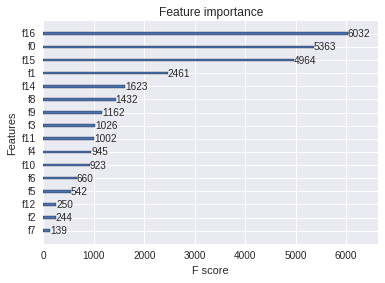

In [631]:
xgb.plot_importance(model)

In [439]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}#, 'eta':[0.1,0.05,0.001]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':42, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', }
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), cv_params, cv = 5, n_jobs = 40) 


In [ ]:
optimized_GBM.fit(train_X,train_y)

In [443]:
optimized_GBM.grid_scores_

[mean: 0.73841, std: 0.01027, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.73845, std: 0.01011, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.73842, std: 0.01011, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.75167, std: 0.00964, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.75178, std: 0.00958, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.75161, std: 0.00969, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.75833, std: 0.00941, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.75838, std: 0.00959, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.75828, std: 0.00965, params: {'max_depth': 7, 'min_child_weight': 5}]